Student ID - 220019482

Module Code - GG3209

Geography - Spatial Analysis with GIS

Assignment: Lab Assignment 2

Degree Programme - Geography

Deadline Date - 20/11/2024


In submitting this assignment I hereby confirm that: I have read the University's statement on Good Academic practice; that the following work is my own work; and that significant acadmeic debts and borrowings have been properly acknowledged and referenced

## Python for Spatial Analysis.

### Lab Assignment 2.

Lab Assignment 2 - Student ID - 220019482 - Link to GitHUB repository - https://github.com/cb454/Lab-Assignment-2

#### Run this cell to connect to your GIS and get started:

In [1]:
from arcgis.gis import GIS
gis = GIS("home")

## Part 1: Python Basics

#### Task 1 - If...Else statement on divisible numbers.

In [96]:
number = 17

if number %3 == 0: #checks whether there's a remainder when number divided by3
    print(str(number) + " is divisible by 3")

else:
    print(str(number) + " is not divisible by 3")

17 is not divisible by 3


#### Task 2 - If...Else statement on lists of fruit.

In [3]:
lst1 = ["apple", "orange", "pear", "kiwi", "strawberry"]

fruit = "banana"



if fruit in lst1: #checking if fruit is in lst1

	print(str(fruit) + " is acceptable")

else:

	print(str(fruit) + " is not acceptable")

banana is not acceptable


#### Task 3 - Function to use haversine formula.

In [ ]:
import math

def haversine(coord1, coord2):
    R = 6371.0  # earth's mean radius (km)

    coord1_rad = list(map(math.radians, coord1))
    coord2_rad = list(map(math.radians, coord2))

    diff_lat = coord2_rad[0] - coord1_rad[0]
    diff_lon = coord2_rad[1] - coord1_rad[1]

    a = math.sin(diff_lat / 2)**2 + math.cos(coord1_rad[0]) * math.cos(coord2_rad[0]) * math.sin(diff_lon / 2)**2
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))

    d = R * c
    return d

In [5]:
# testing def
coord1 = [56.3409, -2.7997]  # St Andrews
coord2 = [-22.9068, -43.1729]  # Rio
print(haversine(coord1, coord2))  

9593.305119185768


### Part 2: Pandas and NumPy:

In [6]:
import pandas as pd
import numpy as np

In [7]:
dataset = '/arcgis/home/portland_park_trees.csv'

In [8]:
portland_park_trees_df = pd.read_csv('/arcgis/home/portland_park_trees.csv') #reading csv file and creating dataframe

In [ ]:
portland_park_trees_df.head(10) #showing first 10 rows of dataframe

#### Question 1 - How many Quercus or Acer genus trees in dataset.

In [10]:
quercus_trees = portland_park_trees_df[portland_park_trees_df['Genus']=='Quercus'] #filtering dataframe by genus

In [11]:
acer_trees = portland_park_trees_df[portland_park_trees_df['Genus']=='Acer'] #filtering dataframe by genus

In [12]:
quercus_acer_trees = len(quercus_trees)+len(acer_trees) #combining number of acer and quercus
print("The number of Quercus or Acer genus trees are " + str(quercus_acer_trees)) 

The number of Quercus or Acer genus trees are 5675


#### Question 2 - How many Quercus or Acer genus trees with DBH larger than 50 inches.

In [ ]:
quercus_dbh50 = quercus_trees[quercus_trees['DBH'] > 50] #filtering quercus by dbh over 50 inches
print(len(quercus_dbh50))

In [ ]:
acer_dbh50 = acer_trees[acer_trees['DBH'] > 50] #filtering acer by dbh over 50 inches
print(len(acer_dbh50))

In [15]:
quercus_acer_dbh50 = len(quercus_dbh50)+len(acer_dbh50)
print("The number of Quercus or Acer genus trees that have a DBH larger than 50 inches are " + str(quercus_acer_dbh50))

The number of Quercus or Acer genus trees that have a DBH larger than 50 inches are 124


#### Question 3 - Which genus out of Quercus, Acer and Fraxinus have highest mean DBH.

In [ ]:
quercus_mean = quercus_trees['DBH'].mean() #average quercus dbh
print(quercus_mean)

In [ ]:
acer_mean = acer_trees['DBH'].mean()
print(acer_mean)

In [18]:
fraxinus_trees = portland_park_trees_df[portland_park_trees_df['Genus']=='Fraxinus']

In [ ]:
fraxinus_mean = fraxinus_trees['DBH'].mean()
print(fraxinus_mean)

In [20]:
genusdbh = {
    'Quercus': quercus_mean,
    'Acer': acer_mean,
    'Fraxinus' : fraxinus_mean
}

In [21]:
print(max(genusdbh, key = genusdbh.get)) #printing the genus with highest average dbh

Quercus


#### Question 4 - How many species recorded in Acer genus?

In [22]:
acer_genus_spec = acer_trees['Genus_spec'].nunique() #counting number of unique species in dataframe
print(acer_genus_spec)

20


#### Question 5 - World Cities Exercise.

In [23]:
dataset = '/arcgis/home/world_cities.csv'

In [24]:
world_cities_df = pd.read_csv('/arcgis/home/world_cities.csv') #reading ssv file and creating datframe

In [ ]:
world_cities_df.head(10) #showing first 10 rows of dataframe

In [26]:
world_cities_df['pop_M'] = world_cities_df['pop'] / 1000000 #creating new column

In [ ]:
world_cities_df.head(10)

In [28]:
del world_cities_df['pop'] #deleting pop column

In [ ]:
world_cities_df.head(10)

In [30]:
c_cities = world_cities_df[world_cities_df['city'].str.startswith('C')] #subsetting cities beginning with letter c
c_cities.head(10)

,city,country,lat,lon,capital,pop_M
5959,Ca Mau,Vietnam,9.18,105.15,0,0.113779
5960,Caacupe,Paraguay,-25.39,-57.14,0,0.022505
5961,Caaguazu,Paraguay,-25.46,-56.02,0,0.056302
5962,Caala,Angola,-12.85,15.58,0,0.021416
5963,Caapucu,Paraguay,-26.23,-57.18,0,0.002287
5964,Caazapa,Paraguay,-26.20,-56.38,0,0.007050
5965,Cabacungan,Philippines,10.32,123.13,0,0.007273
5966,Cabada,Mexico,18.58,-95.44,0,0.011105
5967,Cabadbaran,Philippines,9.12,125.53,0,0.031484
5968,Cabagan,Philippines,17.43,121.76,0,0.025694


In [31]:
# Choosing Caaguazu, Paraguay
# Selecting 5 biggest cities in Paraguay

paraguay_cities = world_cities_df[world_cities_df['country'] == 'Paraguay']
paraguay_cities_top = paraguay_cities.sort_values(by='pop_M', ascending=False)
paraguay_cities_top.head(5)

,city,country,lat,lon,capital,pop_M
2253,Asuncion,Paraguay,-25.30,-57.63,1,0.507574
7806,Ciudad del Este,Paraguay,-25.42,-54.63,0,0.273755
33044,San Lorenzo,Paraguay,-25.34,-57.52,0,0.236594
21752,Luque,Paraguay,-25.27,-57.49,0,0.224438
6425,Capiata,Paraguay,-25.35,-57.42,0,0.215201


### Part 3

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Graph 1 - Scatterplot with DBH and tree height of Ulmus genus. 

In [33]:
ulmus_trees = portland_park_trees_df[portland_park_trees_df['Genus']=='Ulmus']

In [ ]:
ulmus_trees.head(10)

In [35]:
ulmus_dbh = ulmus_trees['DBH']

In [36]:
ulmus_height = ulmus_trees['TreeHeight']

In [ ]:
ulmus_sp = plt.scatter(ulmus_dbh, ulmus_height) #creating scatterplot with DBH mapped to x axis and tree height mapped to y axis
plt.show(ulmus_sp)

Text(0.5, 0.98, 'Ulmus genus with DBH mapped to the tree height')

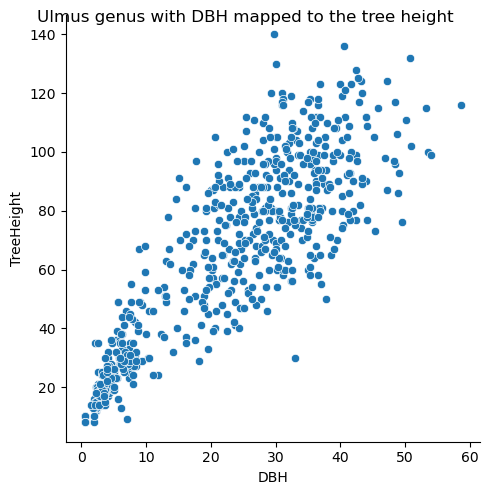

In [38]:
sns.relplot(x=ulmus_dbh, y=ulmus_height).fig.suptitle('Ulmus genus with DBH mapped to the tree height') #scatterplot using seaborn

#### Graph 2 - Scatterplot of Ulmus genus with DBH and tree height and species mapped to hue.

In [39]:
ulmus_species = ulmus_trees['Genus_spec']

Text(0.5, 0.98, 'Ulmus genus with DBH mapped to the tree height and trees mapped by hue')

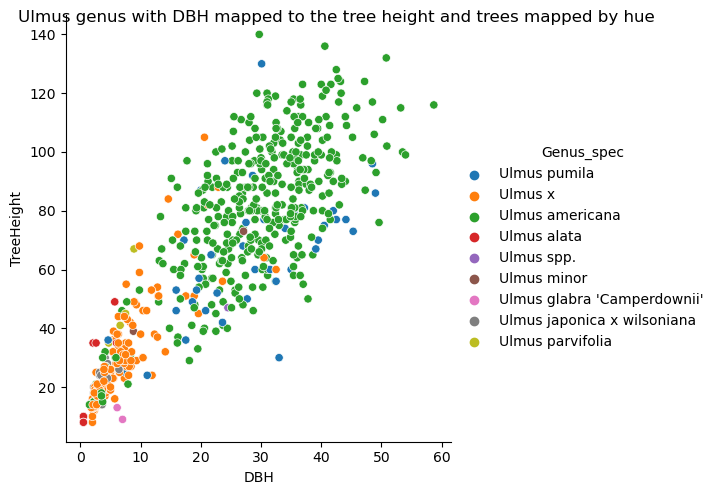

In [40]:
sns.relplot(x=ulmus_dbh, y=ulmus_height, hue=ulmus_species).fig.suptitle('Ulmus genus with DBH mapped to the tree height and trees mapped by hue') #scatterplot with dbh mapped to x axis and tree height mapped to y axis and tree species mapped to hue

#### Graph 3 - Boxplot of DBH for Ulmus genus species.

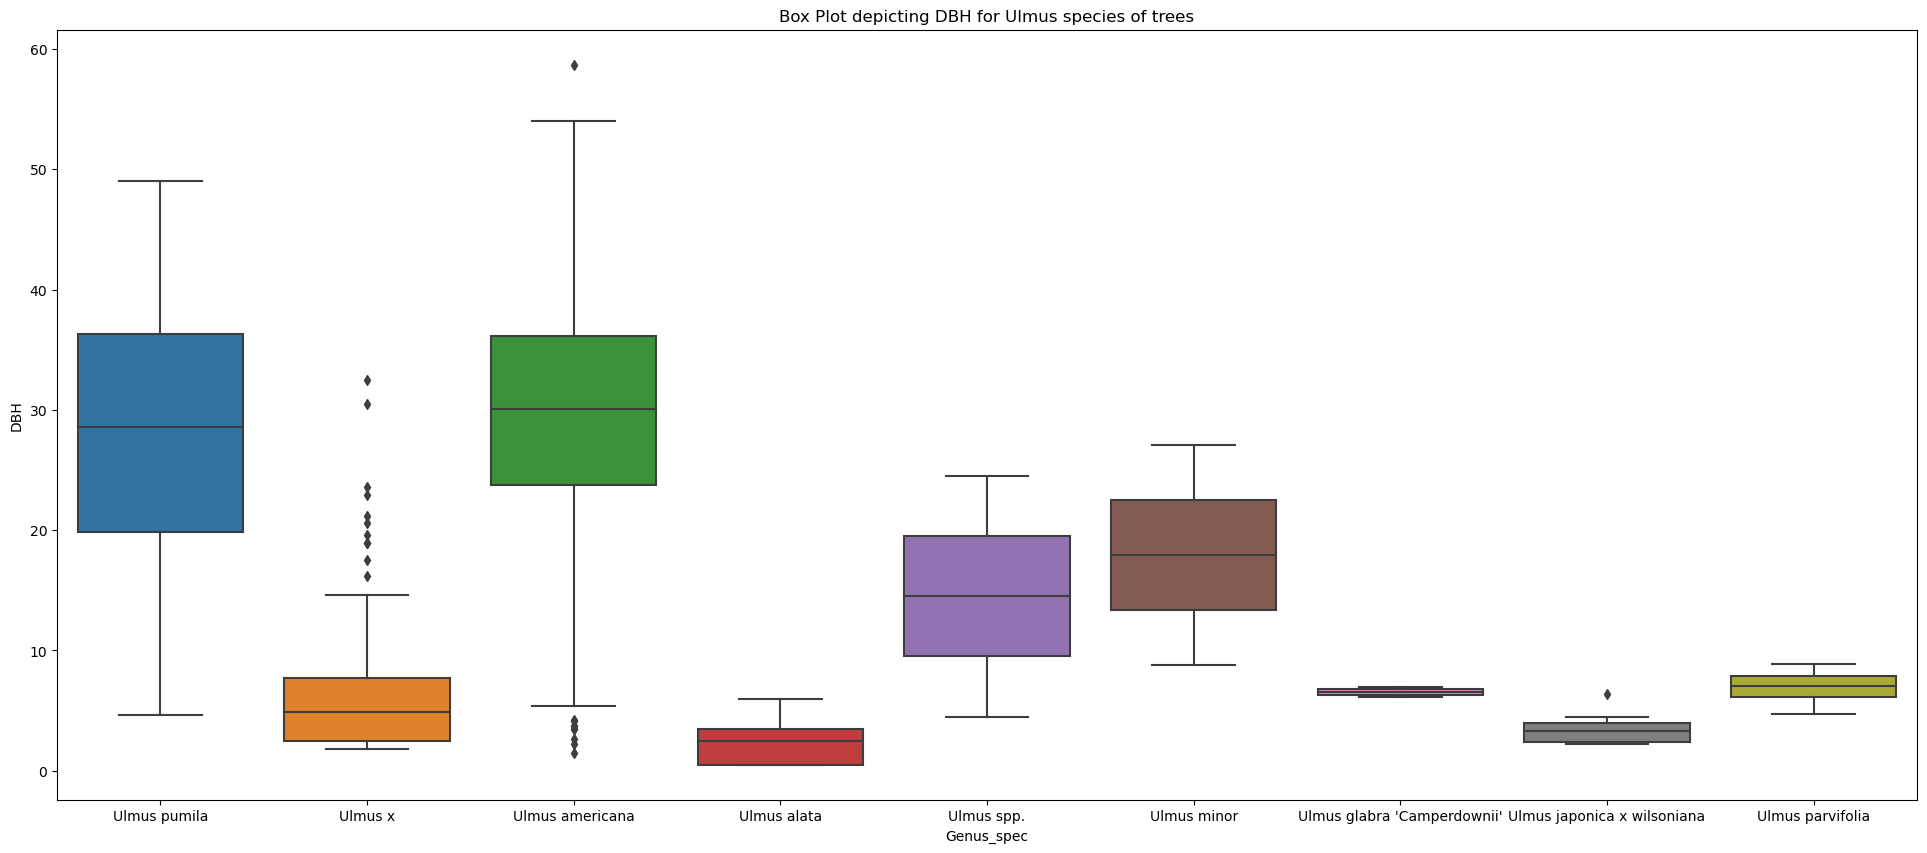

In [41]:
plt.figure(figsize=(24, 10))
sns.boxplot(x=ulmus_species, y=ulmus_dbh)
plt.title('Box Plot depicting DBH for Ulmus species of trees') # box plot for all species - needed to alter figsize to fit all in
plt.show()

#### Graph 4 - Combining Graphs 1 and 3.

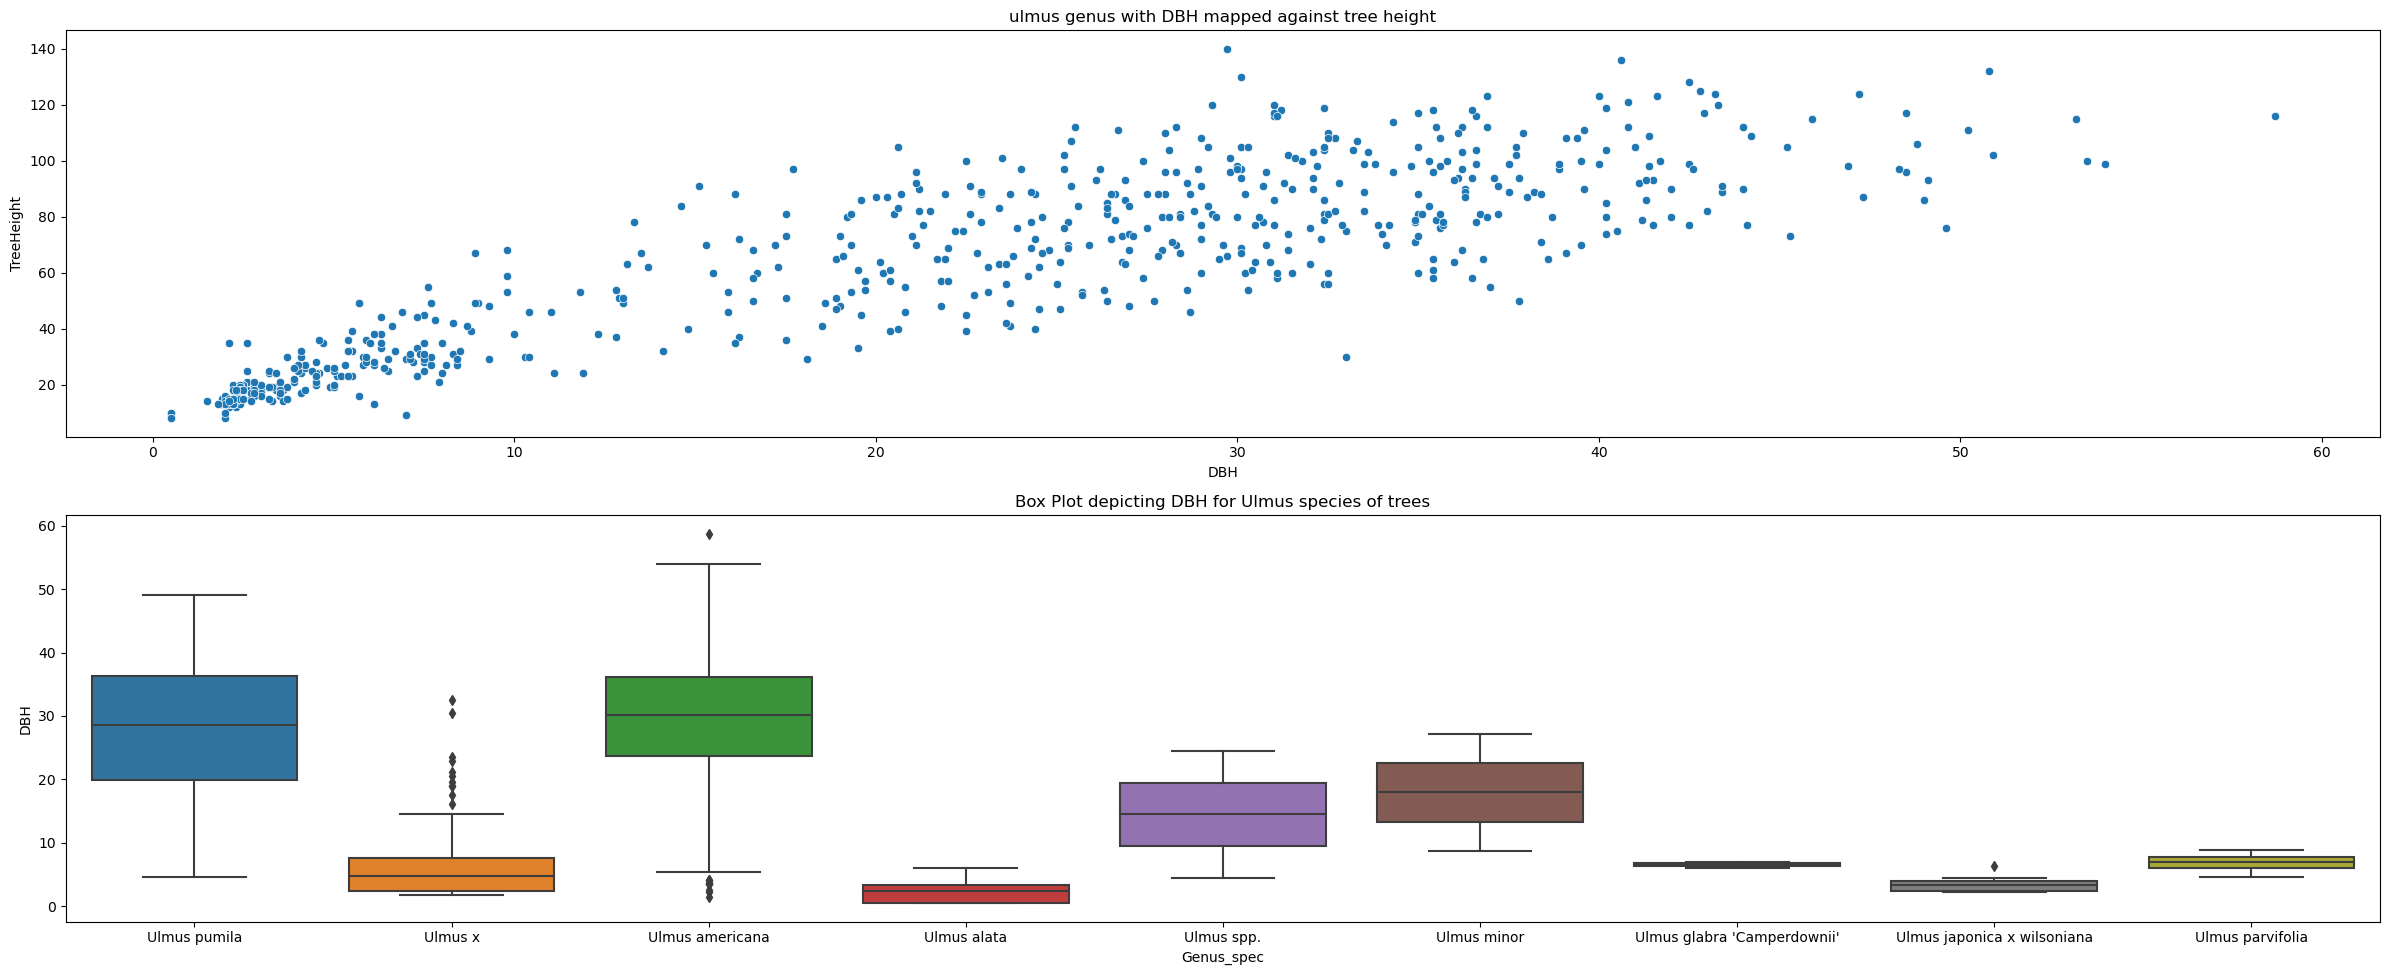

In [42]:
fig, axes = plt.subplots(2, 1, figsize=(24,10))

sns.scatterplot(x=ulmus_dbh, y=ulmus_height, ax=axes[0]) #creating scatterplot with DBH mapped to x axis and tree height mapped to y axis
axes[0].set_title('ulmus genus with DBH mapped against tree height') 

sns.boxplot(x=ulmus_species, y=ulmus_dbh, ax=axes[1])
axes[1].set_title('Box Plot depicting DBH for Ulmus species of trees') # box plot for all species - needed to alter figsize to fit all in

plt.suptitle('')
plt.tight_layout()
plt.show()


## Part 4

In [ ]:
pip install geopandas fiona shapely pyproj rtree contextily folium matplotlib mapclassify

In [44]:
import geopandas as gpd

#### Task 1 - Read dataset.

In [45]:
dataset = '/arcgis/home/deer data/DCP_SCOTLAND.shp'

In [46]:
dcp_scotland = gpd.read_file('/arcgis/home/deer data/DCP_SCOTLAND.shp') #using geopandas to read shapefile

<AxesSubplot: >

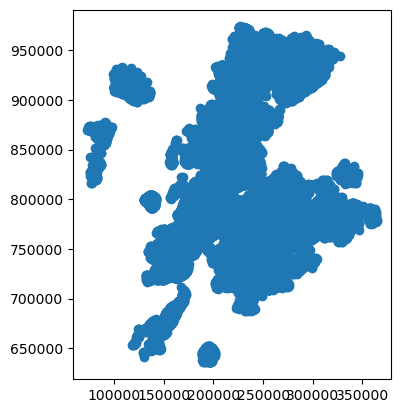

In [47]:
dcp_scotland.plot() #plotting shapefile

#### Task 2 - Plot first 5 and last 5 sets of records in dataset.

In [48]:
dcp_head5 = dcp_scotland.head(5) #first 5 rows of dataframe

In [49]:
dcp_tail5 = dcp_scotland.tail(5) #last 5 rows of dataframe

<AxesSubplot: >

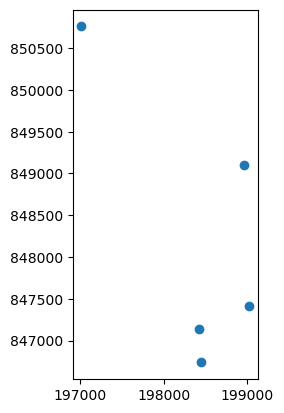

In [50]:
dcp_head5.plot() #plotting first 5 rows

<AxesSubplot: >

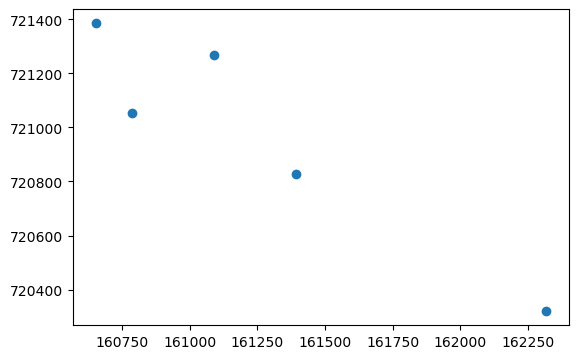

In [51]:
dcp_tail5.plot() #plotting last 5 rows

#### Task 3 - Creating map to explore dataset.

In [ ]:
dcp_head5.head(5)

In [77]:
dcp_scotland.head(1000).explore(column='STAGS', cmap='RdYlBu', tooltip=['STAGS','DMU_NAME']) #interactive map using STAGS as categorical attribute including a tooltip. Had to limit to 1000 rows because the notebook could not save with full map.

#### Task 4 - Finding Coordinate Reference System

In [78]:
print('The Coordinate Reference System is ' + str(dcp_scotland.crs)) #coordinate reference system

The Coordinate Reference System is EPSG:27700


#### Task 5 - How many features in dataset?

In [79]:
number_of_features = len(dcp_scotland) #features in dataset
print('There are ' + str(number_of_features) + ' features in the dataset')

There are 46247 features in the dataset


#### Task 6 - Sub-setting filter based on categorical attribute.

In [80]:
dmu_name = dcp_scotland[dcp_scotland['DMU_NAME'] == "ACHNASHELLACH (NORTH OF ROAD)"] #filter by categorical attribute
dmu_name.head(5)

,UID_,CID,HID,HELIDAY,STAGS,HINDS,CALVES,UNCL,TOTAL,DV,...,VIS_UNCL,VIS_TOTAL,SPECIES,DMU_NAME,DMU_CODE,DMU_AREA,COUNT_ID,DMG,DMG_NAME,geometry
0,31384,56,56,Heli1Day1,0,5,2,0,7,D,...,0,0,None,ACHNASHELLACH (NORTH OF ROAD),SWASWA01,3196.328072,277,None,None,POINT (1.97e+05 8.51e+05)
1,31385,57,57,Heli1Day1,0,3,3,0,6,V,...,0,6,None,ACHNASHELLACH (NORTH OF ROAD),SWASWA01,3196.328072,277,None,None,POINT (1.99e+05 8.49e+05)
2,31386,58,58,Heli1Day1,3,0,0,0,3,V,...,0,3,None,ACHNASHELLACH (NORTH OF ROAD),SWASWA01,3196.328072,277,None,None,POINT (1.99e+05 8.47e+05)
3,31387,59,59,Heli1Day1,17,0,0,0,17,V,...,0,17,None,ACHNASHELLACH (NORTH OF ROAD),SWASWA01,3196.328072,277,None,None,POINT (1.98e+05 8.47e+05)
4,31388,60,60,Heli1Day1,5,0,0,0,5,V,...,0,5,None,ACHNASHELLACH (NORTH OF ROAD),SWASWA01,3196.328072,277,None,None,POINT (1.98e+05 8.47e+05)


### Task 7 - Sub-setting filter based on numerical attribute.

In [81]:
stags = dcp_scotland[dcp_scotland['STAGS'] > 0] #filter by numerical attribute
stags.head(5)

,UID_,CID,HID,HELIDAY,STAGS,HINDS,CALVES,UNCL,TOTAL,DV,...,VIS_UNCL,VIS_TOTAL,SPECIES,DMU_NAME,DMU_CODE,DMU_AREA,COUNT_ID,DMG,DMG_NAME,geometry
2,31386,58,58,Heli1Day1,3,0,0,0,3,V,...,0,3,None,ACHNASHELLACH (NORTH OF ROAD),SWASWA01,3196.328072,277,None,None,POINT (1.99e+05 8.47e+05)
3,31387,59,59,Heli1Day1,17,0,0,0,17,V,...,0,17,None,ACHNASHELLACH (NORTH OF ROAD),SWASWA01,3196.328072,277,None,None,POINT (1.98e+05 8.47e+05)
4,31388,60,60,Heli1Day1,5,0,0,0,5,V,...,0,5,None,ACHNASHELLACH (NORTH OF ROAD),SWASWA01,3196.328072,277,None,None,POINT (1.98e+05 8.47e+05)
5,31389,61,61,Heli1Day1,5,0,0,0,5,V,...,0,5,None,ACHNASHELLACH (NORTH OF ROAD),SWASWA01,3196.328072,277,None,None,POINT (1.98e+05 8.47e+05)
7,31391,63,63,Heli1Day1,2,5,2,0,9,D,...,0,0,None,ACHNASHELLACH (NORTH OF ROAD),SWASWA01,3196.328072,277,None,None,POINT (1.97e+05 8.46e+05)


#### Task 8 - Creating Choropleth Map

<AxesSubplot: >

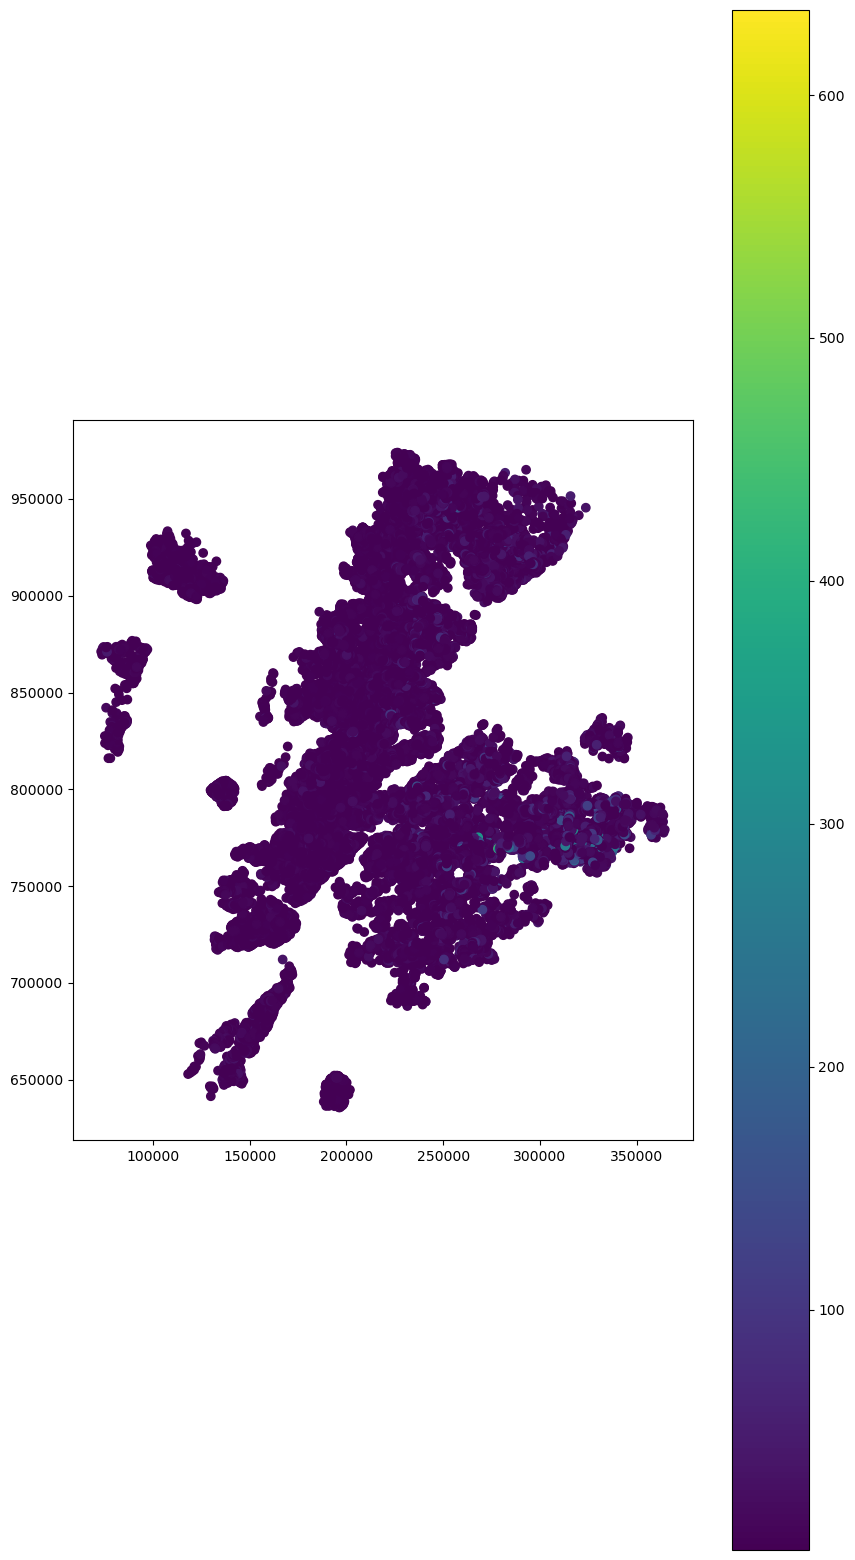

In [82]:
stags.plot(column="STAGS", legend=True) #plotting choropleth map

## Part 5

In [ ]:
pip install earthpy rasterio

In [84]:
import rasterio as rio

#### Task 1 - Read file as rasterio dataset.

In [85]:
dataset = '/arcgis/home/elev.tif'

In [86]:
elev = rio.open('/arcgis/home/elev.tif') #reading as rasterio dataset

#### Task 2 - Coordinate Reference System of dataset.

In [87]:
print('The CRS of the database is ' + str(elev.crs)) #Cordinate Reference System

The CRS of the database is EPSG:32617


#### Task 3 - Describe raster dataset.

In [ ]:
print(elev.bounds)
print(elev.crs)
print(elev.count)

In [89]:
print('The raster datasets bounds which provide the extent using min and max coordinates are ' + str(elev.bounds)+ '. The reference system is ' + str(elev.crs) + ' and the number of bands ' + str(elev.count) + ' relating to the elevation values.')

The raster datasets bounds which provide the extent using min and max coordinates are BoundingBox(left=479753.39945587853, bottom=4170823.2037591375, right=668843.3994558785, top=4347733.203759138). The reference system is EPSG:32617 and the number of bands 1 relating to the elevation values.


#### Task 4 - Plotting raster dataset

In [ ]:
elev_arr = elev.read(1) #loading raster data
elev_arr

In [91]:
image_read_masked = np.ma.masked_array(elev_arr, mask=(elev_arr == 0)) #masking values

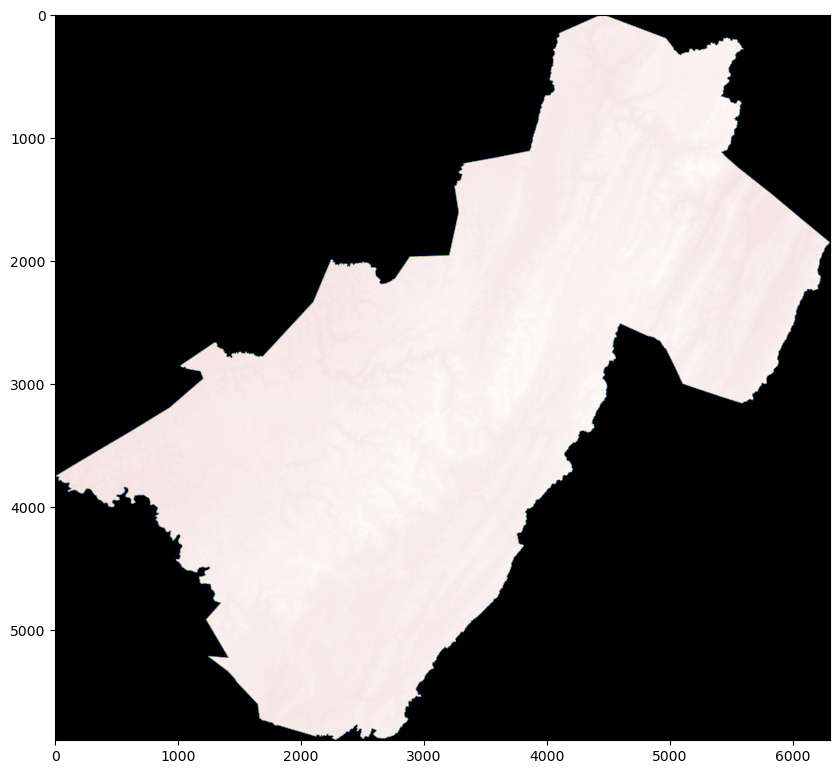

In [92]:
plt.rcParams['figure.figsize'] = [10, 20]
plt.imshow(image_read_masked, cmap="gist_earth") #plotting

#### Task 5 - Creating histograms from raster

In [ ]:
flattened = elev_arr.flatten() # flattening array and plotting original histogram

plt.figure(figsize=(4,3))
sns.histplot(data=flattened, bins=20) #plotting

In [ ]:
histogram_1 = flattened[flattened < 0] # plotting negative values 

plt.figure(figsize=(4,3))
sns.histplot(data=histogram_1, bins=20)

<AxesSubplot: ylabel='Count'>

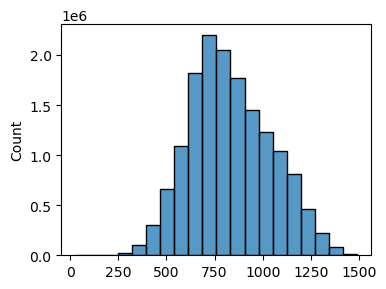

In [95]:
histogram_2 = flattened[flattened > 0] # plotting positive values

plt.figure(figsize=(4,3))
sns.histplot(data=histogram_2, bins=20)